# Linear Regression Model Project in Python

## Project Overview
The English Premier League is one of the world's most-watched soccer leagues, with an estimated audience of 12 million people per game. With the substantial financial benefits, all significant teams of EPL are interested in Analytics and AI. Regarding sports analytics, machine learning and artificial intelligence (AI) have become extremely popular. The sports entertainment sector and the relevant stakeholders extensively use sophisticated algorithms to improve earnings and reduce business risk associated with selecting or betting on the wrong players.
Regression is one of the foundational techniques in Machine Learning. As one of the most well-understood algorithms, linear regression plays a vital role in solving real-life problems. In this project, we wish to use Linear Regression to predict the scores of EPL soccer players.

In [1]:
#import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy
from matplotlib.pyplot import figure

In [2]:
soccer_data = pd.read_csv(r"C:\Users\Paul\Downloads\EPL_Soccer_MLR_LR.csv")

In [3]:
soccer_data.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


In [4]:
soccer_data.shape

(202, 13)

In [6]:
soccer_data.columns

Index(['PlayerName', 'Club', 'DistanceCovered(InKms)', 'Goals',
       'MinutestoGoalRatio', 'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost',
       'PreviousClubCost', 'Height', 'Weight', 'Score'],
      dtype='object')

## Data Dictionary
PlayerName : Player Name

Club : Club of the player

MUN:Manchester United F.C.
CHE: Chelsea F.C.
LIV: Liverpool F.C.
DistanceCovered(InKms): Average Kms distance covered by the player in each game

Goals: Average Goals per match

MinutestoGoalRatio: Minutes

ShotsPerGame: Average shots taken per game

AgentCharges: Agent Fees in h

BMI: Body-Mass index

Cost: Cost of each player in hundread thousand dollars

PreviousClubCost: Previous club cost in hundread thousand dollars

Height: Height of player in cm

Weight: Weight of player in kg

Score: Average score per match

## Exploratory Data Analysis
Exploratory Data Analysis, commonly known as EDA, is a technique to analyze the data with visuals. It involves using statistics and visual techniques to identify particular trends in data.

It is used to understand data patterns, spot anomalies, check assumptions, etc. The main purpose of EDA is to help look into the data before making any hypothesis about it.


## Dataframe Information
The dataframe.info() method prints information about the DataFrame, including the index dtype and columns, non-null values, and memory usage.

It is used to get basic info, look for missing values, and get a sense of each variable's format.

In [7]:
soccer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


## Observations from above
1. No null values
2. PlayerName and Club are objects, Agent Charges are Integers and the rest are Floats

## Actions
Let us convert Agent Charges from Int to float

In [8]:
soccer_data['AgentCharges'] = soccer_data['AgentCharges'].astype(float)

In [9]:
soccer_data.dtypes

PlayerName                 object
Club                       object
DistanceCovered(InKms)    float64
Goals                     float64
MinutestoGoalRatio        float64
ShotsPerGame              float64
AgentCharges              float64
BMI                       float64
Cost                      float64
PreviousClubCost          float64
Height                    float64
Weight                    float64
Score                     float64
dtype: object

# Descriptive Statitics

In [13]:
# descriptive statistics

soccer_data.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


## Observations
1. There are 202 entiries
2. The mean distance is 4.7 km, mean goals is 7.1 and mean minutes to goal is 43.
3. Mean cost is 69.

# Correlation

Correlation coefficient is used to measure the strength of relationship between two variables. It indicates that as the value of one variable changes the other variable changes in a specific direction with some magnitude. There are various ways to find correlation between two variables, one of which is Pearson correlation coefficient. It measures the linear relationship between two continuous variables.

In [20]:
# Drop the 'Club' and 'PlayerName' columns
soccer_data = soccer_data.drop(['Club', 'PlayerName'], axis=1)


soccer_data.corr()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


## Before we make conclusions, let us create a correlation heatmap for better visuals of this table above

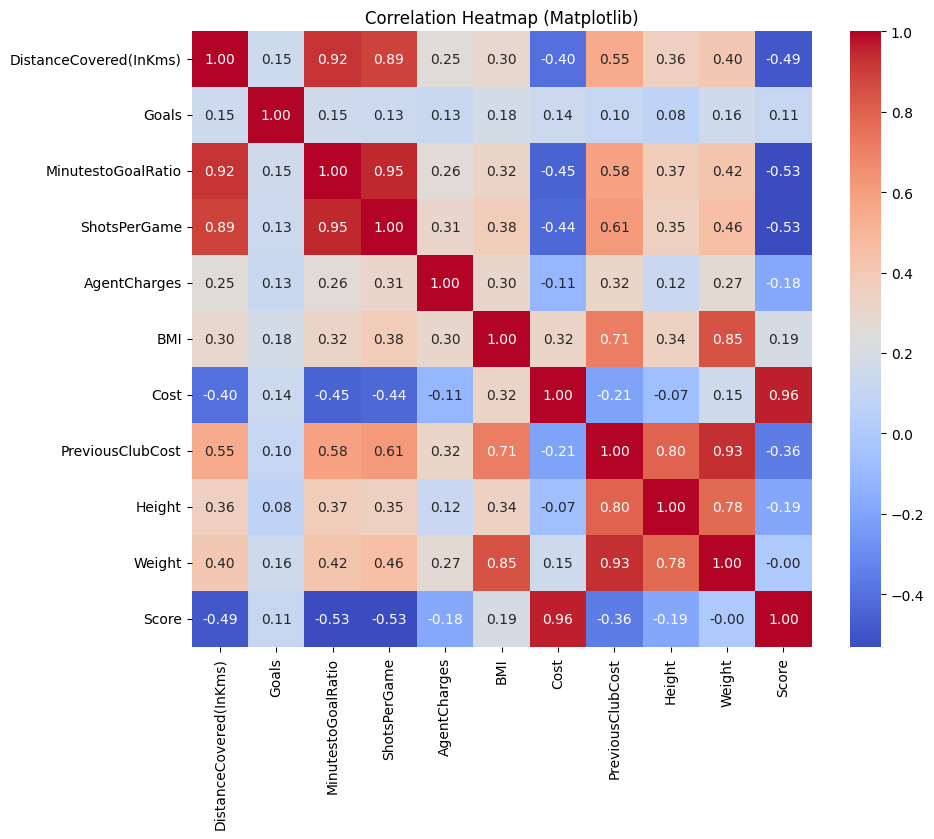

In [22]:
# Matplotlib.pyplot
plt.figure(figsize=(10, 8))
sns.heatmap(soccer_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Matplotlib)')
plt.show()

## Observations
1. Some variables are strongly related. For example, the following have corr exceeding 0.9, Distance Covered and Minutes to Goal at 0.92
2. Shots per game and minutes to goal ratio.
3. Cost and score had a 0.96, the highest
4. Previous club cost and weight at 0.93, and height at 0.80

## Conclusion
If we are to predict the score, then we can choose the strongly correlated one and investigate it.
The cost has a correlation value of 0.96, which means it has a near-linear relationship. 

## Relationship between Cost and Score
Score and Cost have a 96% correlation, making it a significant variable. Cost can be selected as the predictor variable for simple linear regression since the scatter plot between them will demonstrate a linear relationship.

To see this relationship visually, let's plot the scatter plot for Cost and Score.

Text(0.5, 1.0, 'Scatter plot between Cost and Score')

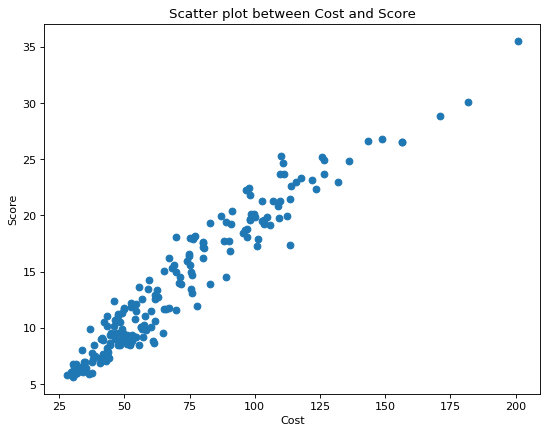

In [25]:
#Let's plot cost vs. score

figure(figsize=(8, 6), dpi=80)
plt.scatter(soccer_data['Cost'], soccer_data['Score'])

# label

plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Scatter plot between Cost and Score")

## Observations
The correlation between Cost and Score is easily visible here and just like correlation, this too is quite strong.

The Pearson correlation and scatter plot demonstrate that as the cost increases, so does the score. But what can we do with this knowledge?

How can we know how much money should be spent to achieve a specific score? This is where Linear Regression comes in. It assists us in modeling the linear relationship between two or more variables so that we may foresee the results using the model.

Let's figure out how.

# Train - Test Split

The data points are divided into two datasets, train and test, in a train test split method. The train data is used to train the model, and the model is then used to predict on the test data to see how the model performs on unseen data and whether it is overfitting or underfitting.

In [27]:
# Assign x, y then do training testing split

x=soccer_data['Cost']
y=soccer_data['Score']

# Splitting with 75% training, 25% testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)

In [28]:
#statsmodels approach to regression
# fit the model
lr = sm.OLS(y_train, x_train).fit()

# Printing the parameters
lr.params
lr.summary()

#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1976.
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           6.91e-88
Time:                        09:41:49   Log-Likelihood:                -293.23
No. Observations:                 151   AIC:                             590.5
Df Residuals:                     149   BIC:                             596.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9472      0.325      2.916      0.0

## Observations
1. This uses ordinary least squares
2. The r^2 is 0.93, which means the predictor, cost determines 93% of the scores.
3. 93% is pretty good. But we can decide to include more variables to see if that can improve.
4. However, the inclusion of more variables should be done so cautiously as to avoid overfitting

# Prediction on Test Data

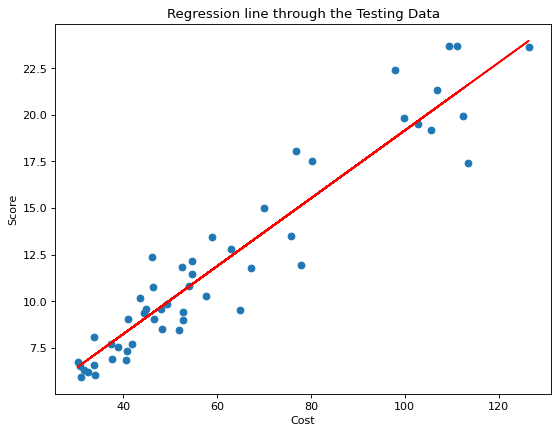

In [29]:
#Plot the fitted line on test data
x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)


# scatter plot on test data
figure(figsize=(8, 6), dpi=80)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Testing Data")

plt.show()

## Observations
Here we can see that the model has built a good regression fit as it is passing through the middle of all the points to get the minimum error.

Observe that all the data points in the test data lie in the range of the training data. This is called interpolation. What if we analyze a data point with a cost say 560? This is extrapolation and the model probably won't be robust to it. Additional model training maybe necessary.

# Assumptions of Linear Regression
Linear regression is a parametric model which means it requires the specification of some parameters before they can be used to make predictions. These parameters or assumptions are:

The relationship between the independent and dependent variable is linear: the line of best fit through the data points is a straight line.

Homoscedasticity: means homogeneity of variance of residuals across the values of the independent variable.

Independence of observations: the observations in the dataset were collected using statistically valid sampling methods, and there are no hidden relationships among observations.

Normality: The data follows a normal distribution.